# RNASeq data generator

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from pandas import read_csv, DataFrame, Series
import pandas as pd
from scipy.stats import poisson
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [7]:
n = 100
beta0 = 3
beta1 = 0.5
IS1 = np.random.choice([0, 1], size=n, replace=True)
mu = np.exp(beta0 + beta1 * IS1)

x = np.arange(n)
y = np.random.poisson(lam=mu, size=n)

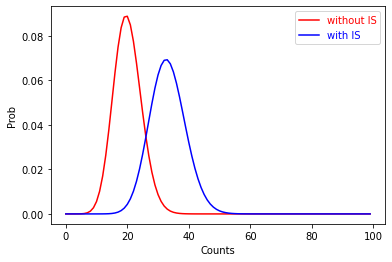

In [3]:
# plot the expected and real transcript counts
plt.figure()
plt.gca().patch.set_facecolor('white')
plt.plot(x, poisson.pmf(x, mu=np.exp(beta0)),'r', label='without IS')
plt.plot(x, poisson.pmf(x, mu=np.exp(beta0 + beta1)),'b', label='with IS')
plt.xlabel('Counts')
plt.ylabel('Prob')
plt.legend(labelcolor='linecolor')
plt.show()

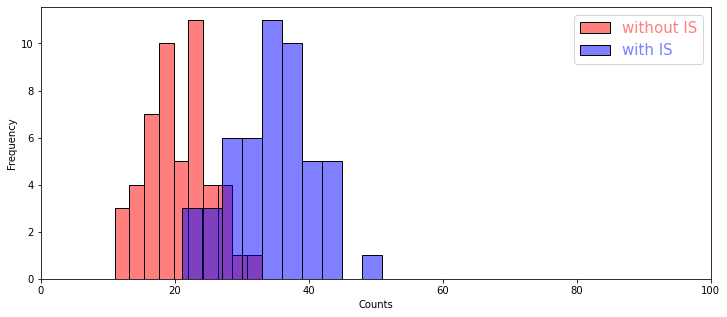

In [8]:
fig = plt.figure(figsize=(12, 5))
fig.patch.set_facecolor('white')
plt.hist(y[IS1 == 0], fc=(1, 0, 0, 0.5), edgecolor='black', label='without IS')
plt.hist(y[IS1 == 1], fc=(0, 0, 1, 0.5), edgecolor='black', label='with IS')
plt.xlim(0, 100)
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.legend(labelcolor='linecolor', prop={'size': 15})
plt.show()

In [9]:
# try to learn the parameters from the observations
df = pd.DataFrame({"x": IS1,
                   "y": y})
mp = sm.formula.glm("y ~ x", family=sm.families.Poisson(), data=df).fit()
print(mp.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -310.37
Date:                Thu, 17 Dec 2020   Deviance:                       110.82
Time:                        10:55:48   Pearson chi2:                     110.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0243      0.031     97.014      0.0

In [10]:
# filter the IS1 out from the count data
y_filt = y / np.exp(IS1 * mp.params.x)


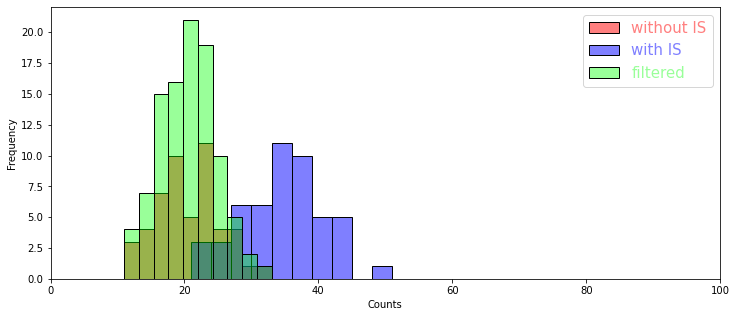

In [11]:
fig = plt.figure(figsize=(12, 5))
fig.patch.set_facecolor('white')
plt.hist(y[IS1 == 0], fc=(1, 0, 0, 0.5), edgecolor='black', label='without IS')
plt.hist(y[IS1 == 1], fc=(0, 0, 1, 0.5), edgecolor='black', label='with IS')
plt.hist(y_filt, fc=(0, 1, 0, 0.4), edgecolor='black', label='filtered')
plt.xlim(0, 100)
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.legend(labelcolor='linecolor', prop={'size': 15})
plt.show()

### RNASeq dataset

#### Generate RNASeq for one class (the equivalent of STA class)
##### Additional params: the number of transcripts, the distribution of betas over them

In [12]:
t = 100
n = 20
beta0 = np.random.normal(2, 1, t)
beta1 = np.append(np.zeros(t-10), np.linspace(0, 1, 10))

counts = np.zeros((t, n), dtype=int)
for i in range(t):
    mu = np.exp(beta0[i] + beta1[i] * IS1)
    counts[i, :] = np.random.poisson(lam=mu[:n], size=n)

In [13]:
counts_df_STA = pd.DataFrame(data=counts,
                             index=["transcript" + str(num) for num in range(t)],
                             columns=["STA" + str(num) for num in range(n)],
                             dtype=int)

In [14]:
counts_df_STA.head()

,STA0,STA1,STA2,STA3,STA4,STA5,STA6,STA7,STA8,STA9,STA10,STA11,STA12,STA13,STA14,STA15,STA16,STA17,STA18,STA19
transcript0,69,67,79,67,50,65,70,69,73,78,78,71,65,64,51,79,67,60,55,57
transcript1,16,10,10,9,8,12,9,11,14,11,13,7,10,19,9,8,12,14,17,9
transcript2,19,25,19,17,16,20,21,20,19,22,16,20,18,14,25,16,19,18,16,22
transcript3,14,10,6,8,6,7,8,10,10,9,8,11,6,9,9,10,9,7,9,10
transcript4,47,43,59,59,45,57,52,40,52,44,60,55,73,53,51,53,50,72,64,53


#### Generate RNASeq for different class (the equivalent of CR class)
##### 10 transcripts class dependant, the role of IS unchanged

In [15]:
beta0_CR = beta0 + np.random.permutation(np.append(np.zeros(t-10), np.random.normal(0.5, 0.5, 10)))

counts = np.zeros((t, n), dtype=int)
for i in range(t):
    mu = np.exp(beta0_CR[i] + beta1[i] * IS1)
    counts[i, :] = np.random.poisson(lam=mu[:n], size=n)

In [16]:
counts_df_CR = pd.DataFrame(data=counts,
                            index=["transcript" + str(num) for num in range(t)],
                            columns=["CR" + str(num) for num in range(n)],
                            dtype=int)

In [17]:
counts_df_CR.head()

,CR0,CR1,CR2,CR3,CR4,CR5,CR6,CR7,CR8,CR9,CR10,CR11,CR12,CR13,CR14,CR15,CR16,CR17,CR18,CR19
transcript0,55,62,49,58,41,46,57,62,57,50,55,64,52,56,66,47,47,55,43,41
transcript1,15,16,13,14,13,24,18,11,10,8,16,16,9,16,15,13,14,17,11,12
transcript2,22,20,27,18,18,23,22,14,24,25,27,17,22,13,17,27,23,17,23,24
transcript3,7,8,5,8,7,5,11,10,12,8,8,4,4,12,15,8,6,13,5,6
transcript4,66,39,58,59,48,47,70,40,67,60,52,60,60,47,57,60,47,62,54,52


In [18]:
RNASeq = pd.concat([counts_df_STA, counts_df_CR], axis=1)

#### Generate RNASeq for different class (the equivalent of OT class)
##### 10 transcripts class dependant, no role of IS

In [19]:
beta0_OT = beta0 + np.random.permutation(np.append(np.zeros(t-10), np.random.normal(0.5, 0.5, 10)))

counts = np.zeros((t, n), dtype=int)
for i in range(t):
    mu = np.exp(beta0_OT[i])
    counts[i, :] = np.random.poisson(lam=mu, size=n)

In [20]:
counts_df_OT = pd.DataFrame(data=counts,
                            index=["transcript" + str(num) for num in range(t)],
                            columns=["OT" + str(num) for num in range(n)])

RNASeq = pd.concat([RNASeq, counts_df_OT], axis=1)

In [21]:
RNASeq.head()

,STA0,STA1,STA2,STA3,STA4,STA5,STA6,STA7,STA8,STA9,...,OT10,OT11,OT12,OT13,OT14,OT15,OT16,OT17,OT18,OT19
transcript0,69,67,79,67,50,65,70,69,73,78,...,167,164,172,146,174,156,161,187,168,161
transcript1,16,10,10,9,8,12,9,11,14,11,...,10,17,11,10,16,18,7,22,11,18
transcript2,19,25,19,17,16,20,21,20,19,22,...,19,23,19,14,24,21,27,29,18,16
transcript3,14,10,6,8,6,7,8,10,10,9,...,2,5,2,9,4,5,9,11,6,6
transcript4,47,43,59,59,45,57,52,40,52,44,...,30,52,44,51,59,56,62,47,61,57
